## Assignment Task: Path Interpolation and Visualization

In this exercise, you are provided with a CSV file named `loop_track_waypoints.csv`, which contains a sequence of indexed 2D waypoints that form a closed-loop track. Your task is to interpolate these waypoints to generate a smooth continuous path and visualize the resulting curve.

### Dataset Description

The CSV file contains the following columns:

- `Index`: An integer representing the order of the waypoint.
- `x`: The x-coordinate of the waypoint (in meters).
- `y`: The y-coordinate of the waypoint (in meters).

The track is closed, i.e., the final waypoint coincides with the starting point to form a loop.

### Objectives

1. **Read** the CSV file using an appropriate data processing library such as `pandas`.
2. **Perform interpolation** over the waypoints using a method of your choice (e.g., `scipy.interpolate` or spline interpolation).
3. **Visualize** both the original discrete waypoints and the resulting smooth curve on the same plot for comparison.
4. Ensure the interpolated path **preserves the closed-loop nature** of the track.

### Recommended Libraries

You may use the following libraries:
- `pandas` for reading the CSV file.
- `matplotlib` or `plotly` for visualization.
- `scipy.interpolate` (e.g., `splprep` and `splev`) or `interp1d` for interpolation.

### 📌 Instructions

- Ensure that the file `loop_track_waypoints.csv` is placed in the **same directory** as this notebook.
- Label your axes and add a legend to your plot.
- Comment your code appropriately to explain the logic and steps used.
- Try using both linear and spline-based interpolation methods if time permits.


In [61]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from scipy.interpolate import CubicSpline

In [ ]:
with open ('loop_track_waypoints.csv','r') as f:
    data=csv.reader(f) 
    data=pd.DataFrame(data)
x=data[1:][1].astype(float).to_numpy()
y=data[1:][2].astype(float).to_numpy()
print(max(x), min(x))
distances = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
t = np.concatenate(([0], np.cumsum(distances)))

5.924263414625295 -5.913655990811477


In [96]:
cs_x = CubicSpline(t, x)
cs_y = CubicSpline(t, y)
t_fine = np.linspace(0, max(t), 1000)
x_fine = cs_x(t_fine)
y_fine = cs_y(t_fine)

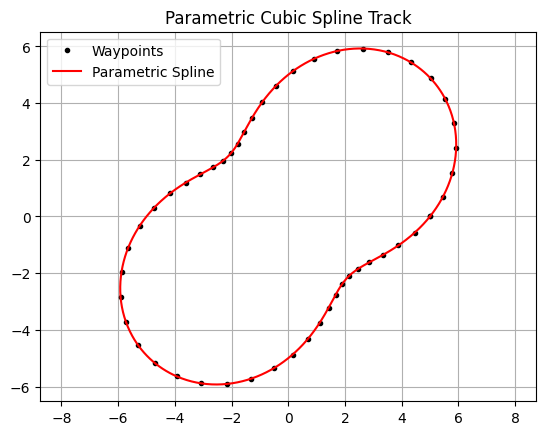

In [97]:
plt.plot(x, y, 'ko', markersize=3, label='Waypoints')
plt.plot(x_fine, y_fine, 'r-', label='Parametric Spline')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.title("Parametric Cubic Spline Track")
plt.show()